In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_openml
heart_disease = fetch_openml(name='heart', parser='auto')
print(heart_disease)

In [12]:
# Splitting data into a and b datasets
a = heart_disease.data
b = heart_disease.target
a.shape, b.shape

((270, 13), (270,))

In [13]:
# Splitting the data into test and train datasets
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=88)
print("Training dataset: ", a_train.shape, b_train.shape)
print("Testing dataset: ", a_test.shape, b_test.shape)

Training dataset:  (216, 13) (216,)
Testing dataset:  (54, 13) (54,)


In [14]:
# Building logitic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [15]:
# training the model using training data
lr.fit(a_train, b_train)

LogisticRegression()

In [16]:
# Predicting values using the testing dataset
b_pred = lr.predict(a_test)
b_pred.shape, b_test.shape

((54,), (54,))

In [18]:
# Performance evaluation
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score , roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(b_pred, b_test))
print("Model precision score: ", precision_score(b_pred, b_test))
print("Model f1 score: ", f1_score(b_pred, b_test))
print("Model recall score: ", recall_score(b_pred, b_test))
print("Model roc-auc score:  ", roc_auc_score(b_pred, b_test))
print("Model confusion matrix: ", confusion_matrix(b_pred, b_test))


Model accuracy score:  0.8888888888888888
Model precision score:  0.8333333333333334
Model f1 score:  0.8695652173913043
Model recall score:  0.9090909090909091
Model roc-auc score:   0.8920454545454545
Model confusion matrix:  [[28  4]
 [ 2 20]]


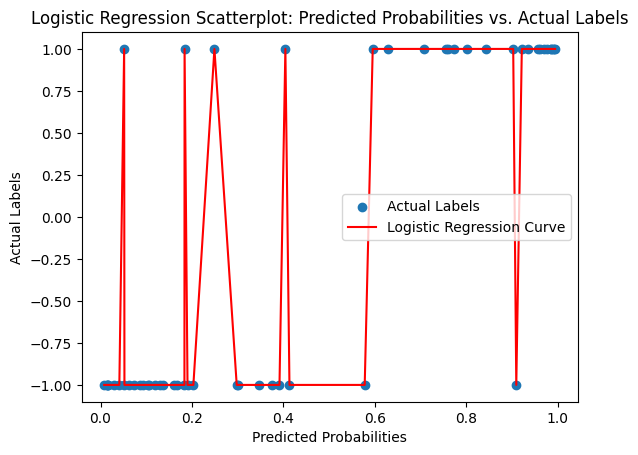

In [19]:
#Scatterplot between predicted values vs. Actual values
b_pred_proba = lr.predict_proba(a_test)[:, 1]  # Predicted probabilities for class 1 (positive class)

# Sort the predicted probabilities and actual labels based on predicted probabilities
sorted_indices = np.argsort(b_pred_proba)
b_pred_proba_sorted = b_pred_proba[sorted_indices]
b_test_sorted = b_test[sorted_indices]

# Plot scatterplot
plt.scatter(b_pred_proba, b_test, label='Actual Labels')
plt.xlabel("Predicted Probabilities")
plt.ylabel("Actual Labels")
plt.title("Logistic Regression Scatterplot: Predicted Probabilities vs. Actual Labels")

# Plot logistic regression curve
plt.plot(b_pred_proba_sorted, b_test_sorted, color='red', label='Logistic Regression Curve')
plt.legend()
plt.show()